In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

2024-11-26 09:51:09.778809: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 09:51:09.781638: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 09:51:09.789425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732594869.802588   40991 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732594869.806548   40991 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-26 09:51:09.822057: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [4]:
%autocall 1

Automatic calling is: Smart


In [5]:
high_pass_filter = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

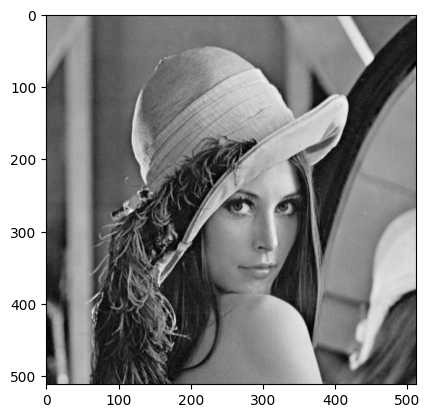

In [12]:
image_path = "images/lena_std.tif"
image = Image.open(image_path)
image = image.convert('L')

# image.show()

plt.imshow(image, cmap='gray')
plt.show()

In [16]:
image.size
high_pass_filter.shape

(3, 3)

In [22]:
def apply_filter(image, mask):
    image_height, image_width = image.size
    mask_height, mask_width = mask.shape

    pad_height = mask_height // 2    
    pad_width = mask_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    filtered_image = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + mask_height, j: j + mask_width]
            filtered_image[i, j] = np.sum(region * mask).clip(0, 255)

    return filtered_image

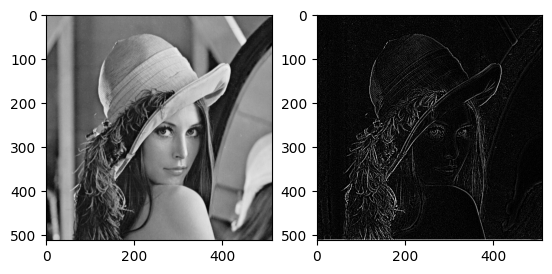

In [23]:
filtered_image = apply_filter(image, high_pass_filter)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.show()

In [28]:
def high_boost_filter(image, mask, a):
    high_pass_image = apply_filter(image, mask)
    image = np.array(image)
    low_pass_image = image - high_pass_image
    boosted_image = (a * image) - low_pass_image
    boosted_image = Image.fromarray(boosted_image)
    return boosted_image

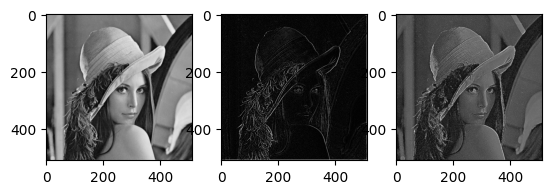

In [29]:
a = 1.5
boosted_image = high_boost_filter(image, high_pass_filter, a)

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(filtered_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(boosted_image, cmap='gray')
plt.show()